In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import logging
from zipfile import ZipFile
import os

# Initialize logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(message)s')
logger = logging.getLogger(__name__)


#### Define Functions for Loading Data

In [2]:
def load_data_from_zip(zip_path, file_name):
    """
    Load a CSV file from a ZIP archive without extracting the whole archive.
    
    Args:
        zip_path (str): Path to the ZIP file.
        file_name (str): Name of the file to extract from the ZIP.

    Returns:
        pd.DataFrame: Loaded data as a DataFrame.
    """
    try:
        with ZipFile(zip_path) as z:
            with z.open(file_name) as f:
                logger.info(f"Loading {file_name} from {zip_path}")
                return pd.read_csv(f)
    except Exception as e:
        logger.error(f"Error loading {file_name}: {e}")
        return None


In [4]:
if __name__ == "__main__":
    # Path to the ZIP file
    zip_path = "../data/rossmann-store-sales.zip"

    # Load datasets
    train_data = load_data_from_zip(zip_path, "train.csv")
    test_data = load_data_from_zip(zip_path, "test.csv")
    store_data = load_data_from_zip(zip_path, "store.csv")

    # Display basic info
    logger.info(f"Train Data Shape: {train_data.shape}")
    logger.info(f"Test Data Shape: {test_data.shape}")
    logger.info(f"Store Data Shape: {store_data.shape}")


2025-01-01 14:05:39,790 - Loading train.csv from ../data/rossmann-store-sales.zip
/tmp/ipykernel_17902/2004989911.py:16: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(f)
2025-01-01 14:05:40,224 - Loading test.csv from ../data/rossmann-store-sales.zip
2025-01-01 14:05:40,241 - Loading store.csv from ../data/rossmann-store-sales.zip
2025-01-01 14:05:40,244 - Train Data Shape: (1017209, 9)
2025-01-01 14:05:40,245 - Test Data Shape: (41088, 8)
2025-01-01 14:05:40,245 - Store Data Shape: (1115, 10)


#### Perform Initial Cleaning

In [5]:
def clean_data(df):
    """
    Perform initial cleaning on the dataset.
    
    Args:
        df (pd.DataFrame): The DataFrame to clean.

    Returns:
        pd.DataFrame: Cleaned DataFrame.
    """
    logger.info("Cleaning data...")
    # Drop duplicates
    df.drop_duplicates(inplace=True)
    
    # Handle missing values (example)
    missing_cols = df.columns[df.isnull().any()]
    logger.info(f"Columns with missing values: {missing_cols.tolist()}")
    df.fillna(-1, inplace=True)  # Replace NaNs with -1 as an example
    
    return df


In [6]:
train_data = clean_data(train_data)
test_data = clean_data(test_data)
store_data = clean_data(store_data)


2025-01-01 14:06:03,515 - Cleaning data...
2025-01-01 14:06:03,751 - Columns with missing values: []
2025-01-01 14:06:03,797 - Cleaning data...
2025-01-01 14:06:03,806 - Columns with missing values: ['Open']
2025-01-01 14:06:03,809 - Cleaning data...
2025-01-01 14:06:03,811 - Columns with missing values: ['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


#### Visualize Initial Insights

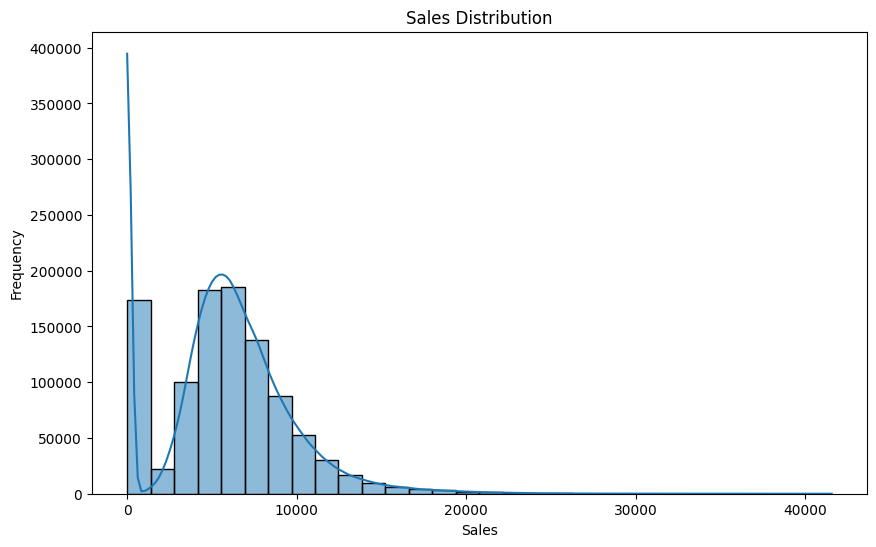

In [8]:
def plot_sales_distribution(train_data):
    """
    Plot the sales distribution.

    Args:
        train_data (pd.DataFrame): Training dataset.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(train_data['Sales'], kde=True, bins=30)
    plt.title("Sales Distribution")
    plt.xlabel("Sales")
    plt.ylabel("Frequency")
    plt.show()

# Plot sales distribution
plot_sales_distribution(train_data)
